# Importing Statements

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import seaborn as sns

# Fixing the Given DATA

## Calling

In [3]:
train_file = pd.read_csv("Gotem Pumpkins.csv")
test_file = pd.read_csv("Test.csv")

# drop unnecessary columns on both files
train_file = train_file.drop(columns=["Unnamed: 0"], errors="ignore",axis=1)
test_file = test_file.drop(columns=["Unnamed: 0"], errors="ignore",axis=1)

In [4]:
train_file

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Convex_Area,Equiv_Diameter,Eccentricity,Solidity,Extent,Roundness,Aspect_Ration,Compactness,Class
0,84930,1204.448,508.7883,213.0266,85665,328.8407,0.9081,0.9914,0.5482,0.7357,2.3884,0.6463,Ürgüp Sivrisi
1,103343,1275.261,521.4694,252.8941,104156,362.7401,0.8745,0.9922,0.7457,0.7985,2.0620,0.6956,Ürgüp Sivrisi
2,98350,1269.539,526.2346,238.4702,99184,353.8688,0.8914,0.9916,0.5919,0.7668,2.2067,0.6725,Ürgüp Sivrisi
3,69517,1059.538,429.8407,206.8250,70493,297.5093,0.8766,0.9862,0.6623,0.7782,2.0783,0.6921,Çerçevelik
4,80011,1182.947,501.9065,204.7531,80902,319.1758,0.9130,0.9890,0.7374,0.7185,2.4513,0.6359,Ürgüp Sivrisi
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,68292,982.052,368.6867,237.1654,68891,294.8764,0.7656,0.9913,0.7212,0.8898,1.5546,0.7998,Çerçevelik
1996,82272,1121.769,459.4482,228.2780,82865,323.6541,0.8678,0.9928,0.7321,0.8216,2.0127,0.7044,Ürgüp Sivrisi
1997,72049,1023.784,398.3945,230.5932,72732,302.8789,0.8155,0.9906,0.7638,0.8638,1.7277,0.7602,Çerçevelik
1998,73703,1065.980,422.3591,223.3923,74461,306.3357,0.8487,0.9898,0.6380,0.8151,1.8907,0.7253,Çerçevelik


In [5]:
test_file

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Convex_Area,Equiv_Diameter,Eccentricity,Solidity,Extent,Roundness,Aspect_Ration,Compactness,Class
0,63011,961.163,371.5589,216.5940,63511,283.2456,0.8125,0.9921,0.7301,0.8571,1.7155,0.7623,Çerçevelik
1,75917,1069.411,420.2925,230.6208,76613,310.9028,0.8360,0.9909,0.7132,0.8342,1.8224,0.7397,Çerçevelik
2,75988,1091.948,447.6035,217.3051,76566,311.0481,0.8742,0.9925,0.7079,0.8008,2.0598,0.6949,Ürgüp Sivrisi
3,85968,1168.743,479.1606,229.2326,87008,330.8442,0.8781,0.9880,0.7495,0.7909,2.0903,0.6905,Çerçevelik
4,85386,1138.193,438.2698,248.8453,86282,329.7224,0.8232,0.9896,0.7093,0.8283,1.7612,0.7523,Çerçevelik
...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,96325,1305.855,551.3950,224.9857,97155,350.2068,0.9130,0.9915,0.5223,0.7098,2.4508,0.6351,Ürgüp Sivrisi
496,97672,1245.298,512.0015,243.4767,98354,352.6469,0.8797,0.9931,0.6428,0.7915,2.1029,0.6888,Ürgüp Sivrisi
497,74286,1119.418,469.9465,202.6598,75036,307.5449,0.9022,0.9900,0.7523,0.7450,2.3189,0.6544,Ürgüp Sivrisi
498,85924,1113.974,428.2503,256.8931,86515,330.7595,0.8001,0.9932,0.7242,0.8701,1.6670,0.7724,Çerçevelik


## Fixing the datatypes

as we know the class consists of the name of the pumpkins like Çerçevelik and Ürgüp Sivrisi
so we need to make theese to numerical value as 0's and 1's

In [6]:
train_file = pd.get_dummies(train_file,'Class',drop_first=True)
train_file["Class_Ürgüp Sivrisi"] = train_file["Class_Ürgüp Sivrisi"].astype(int)

test_file = pd.get_dummies(test_file,'Class',drop_first=True)
test_file["Class_Ürgüp Sivrisi"] = test_file["Class_Ürgüp Sivrisi"].astype(int)

In [7]:
train_file

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Convex_Area,Equiv_Diameter,Eccentricity,Solidity,Extent,Roundness,Aspect_Ration,Compactness,Class_Ürgüp Sivrisi
0,84930,1204.448,508.7883,213.0266,85665,328.8407,0.9081,0.9914,0.5482,0.7357,2.3884,0.6463,1
1,103343,1275.261,521.4694,252.8941,104156,362.7401,0.8745,0.9922,0.7457,0.7985,2.0620,0.6956,1
2,98350,1269.539,526.2346,238.4702,99184,353.8688,0.8914,0.9916,0.5919,0.7668,2.2067,0.6725,1
3,69517,1059.538,429.8407,206.8250,70493,297.5093,0.8766,0.9862,0.6623,0.7782,2.0783,0.6921,0
4,80011,1182.947,501.9065,204.7531,80902,319.1758,0.9130,0.9890,0.7374,0.7185,2.4513,0.6359,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,68292,982.052,368.6867,237.1654,68891,294.8764,0.7656,0.9913,0.7212,0.8898,1.5546,0.7998,0
1996,82272,1121.769,459.4482,228.2780,82865,323.6541,0.8678,0.9928,0.7321,0.8216,2.0127,0.7044,1
1997,72049,1023.784,398.3945,230.5932,72732,302.8789,0.8155,0.9906,0.7638,0.8638,1.7277,0.7602,0
1998,73703,1065.980,422.3591,223.3923,74461,306.3357,0.8487,0.9898,0.6380,0.8151,1.8907,0.7253,0


In [8]:
test_file

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Convex_Area,Equiv_Diameter,Eccentricity,Solidity,Extent,Roundness,Aspect_Ration,Compactness,Class_Ürgüp Sivrisi
0,63011,961.163,371.5589,216.5940,63511,283.2456,0.8125,0.9921,0.7301,0.8571,1.7155,0.7623,0
1,75917,1069.411,420.2925,230.6208,76613,310.9028,0.8360,0.9909,0.7132,0.8342,1.8224,0.7397,0
2,75988,1091.948,447.6035,217.3051,76566,311.0481,0.8742,0.9925,0.7079,0.8008,2.0598,0.6949,1
3,85968,1168.743,479.1606,229.2326,87008,330.8442,0.8781,0.9880,0.7495,0.7909,2.0903,0.6905,0
4,85386,1138.193,438.2698,248.8453,86282,329.7224,0.8232,0.9896,0.7093,0.8283,1.7612,0.7523,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,96325,1305.855,551.3950,224.9857,97155,350.2068,0.9130,0.9915,0.5223,0.7098,2.4508,0.6351,1
496,97672,1245.298,512.0015,243.4767,98354,352.6469,0.8797,0.9931,0.6428,0.7915,2.1029,0.6888,1
497,74286,1119.418,469.9465,202.6598,75036,307.5449,0.9022,0.9900,0.7523,0.7450,2.3189,0.6544,1
498,85924,1113.974,428.2503,256.8931,86515,330.7595,0.8001,0.9932,0.7242,0.8701,1.6670,0.7724,0


## Checking for Correlations

                         Area  Perimeter  Major_Axis_Length  \
Area                 1.000000   0.930120           0.793882   
Perimeter            0.930120   1.000000           0.948051   
Major_Axis_Length    0.793882   0.948051           1.000000   
Minor_Axis_Length    0.689095   0.400400           0.112192   
Convex_Area          0.999798   0.931543           0.793849   
Equiv_Diameter       0.998535   0.929545           0.792010   
Eccentricity         0.168770   0.469946           0.705272   
Solidity             0.169039   0.076395           0.126520   
Extent              -0.003753  -0.121404          -0.193530   
Roundness           -0.145632  -0.494012          -0.677444   
Aspect_Ration        0.166356   0.491042           0.728367   
Compactness         -0.167291  -0.488061          -0.726363   
Class_Ürgüp Sivrisi  0.171270   0.384307           0.556790   

                     Minor_Axis_Length  Convex_Area  Equiv_Diameter  \
Area                          0.689095     0.9

<Axes: >

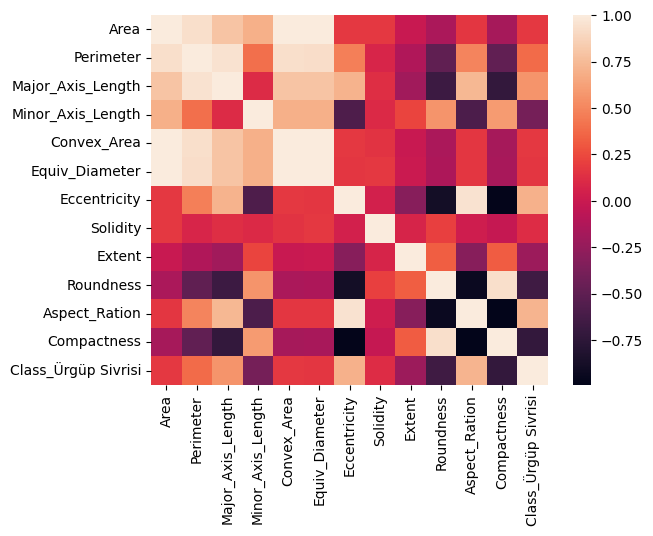

In [9]:
train_corr = train_file.select_dtypes(include=['float64','int64'],).corr()
print(train_corr)
sns.heatmap(train_corr)

We dropped theese columns Perimeter ,Convex area, Eqiv diameter ,Aspect ratio and compactness
after seeing the heatmap and co-relation table

In [10]:
train_file = train_file.drop(['Perimeter','Convex_Area','Equiv_Diameter','Aspect_Ration','Compactness'],axis=1)
test_file = test_file.drop(['Perimeter','Convex_Area','Equiv_Diameter','Aspect_Ration','Compactness'],axis=1)

In [11]:
print(f"{train_file}\n{test_file}")

        Area  Major_Axis_Length  Minor_Axis_Length  Eccentricity  Solidity  \
0      84930           508.7883           213.0266        0.9081    0.9914   
1     103343           521.4694           252.8941        0.8745    0.9922   
2      98350           526.2346           238.4702        0.8914    0.9916   
3      69517           429.8407           206.8250        0.8766    0.9862   
4      80011           501.9065           204.7531        0.9130    0.9890   
...      ...                ...                ...           ...       ...   
1995   68292           368.6867           237.1654        0.7656    0.9913   
1996   82272           459.4482           228.2780        0.8678    0.9928   
1997   72049           398.3945           230.5932        0.8155    0.9906   
1998   73703           422.3591           223.3923        0.8487    0.9898   
1999   74525           478.0779           200.0458        0.9082    0.9733   

      Extent  Roundness  Class_Ürgüp Sivrisi  
0     0.5482    

# Defining all the required function

## sigmoid function

In [12]:
def sigmoid(X,w,b):
    z = np.dot(X,w) + b
    sigmd = 1/(1+np.exp(-z))
    return sigmd

## loss function

In [13]:
def loss(y,f):
    m = len(y)
    loss = -y*np.log(f)-(1-y)*np.log(1-f)
    return loss

## Gradiants function

In [14]:
def gradient(X,y,w,b):
    m = len(X_train)
    dwj = np.zeros
    dbj = 0
    error = sigmoid(X,w,b)-y
    dbj += np.sum(error)
    dwj = np.dot(X.T,error)
    return dwj/m,dbj/m

## Gradiant Descent

In [16]:
def gradient_descent(X,y,winit,binit,alpha,iterations):
    costs = []
    w = winit
    b = binit
    m = len(X_train)
    for i in range(iterations):
        dwj,dbj = gradient(X,y,w,b)
        w-= alpha*dwj
        b-= alpha*dbj
        c = np.sum(loss(y,sigmoid(X,w,b)))/m
        costs.append(c)
    return w,b,costs


## prediction function

In [17]:
def predict(X, w, b, threshold=0.5):
    f = sigmoid(X, w, b)  # Get the probabilities
    return (f >= threshold).astype(int)  # Convert probabilities to binary predictions (0 or 1)

## Accuracy Function

In [18]:
def accuracy(y,yp):
    a = 0
    for i in range(len(y)):
        if y[i] == yp[i]:
            a+=1
    return a/len(y)*100

# Training

stores n no of features of pumpkin in x
and type of pumpkin in y.

In [19]:
X_train = train_file.drop(['Class_Ürgüp Sivrisi'],axis=1)
y_train = train_file['Class_Ürgüp Sivrisi'].astype('float64')

X_test = test_file.drop(['Class_Ürgüp Sivrisi'],axis=1)
y_test = test_file['Class_Ürgüp Sivrisi'].astype('float64')

## Z Score Normalization

In [20]:
train_mean = X_train.mean();
train_std = X_train.std();
X_train = (X_train - train_mean)/train_std

testmean = X_test.mean();
teststd = X_test.std();
X_test = (X_test - testmean)/teststd

print(f"{X_train}\n{X_test}")

          Area  Major_Axis_Length  Minor_Axis_Length  Eccentricity  Solidity  \
0     0.312590           0.925767          -0.547452      1.054758  0.542376   
1     1.654705           1.150884           1.173670      0.299892  0.762329   
2     1.290768           1.235477           0.550975      0.679572  0.597365   
3    -0.810857          -0.475723          -0.815181      0.347071 -0.887318   
4    -0.045954           0.803601          -0.904627      1.164843 -0.117482   
...        ...                ...                ...           ...       ...   
1995 -0.900147          -1.561339           0.494646     -2.146683  0.514882   
1996  0.118849           0.049874           0.110967      0.149368  0.927294   
1997 -0.626301          -1.033961           0.210917     -1.025617  0.322424   
1998 -0.505742          -0.608538          -0.099953     -0.279737  0.102471   
1999 -0.445826           0.380591          -1.107846      1.057005 -4.434059   

        Extent  Roundness  
0    -2.426

In [21]:
winit = np.zeros_like(X_train.loc[0])
binit = 0
w,b,costs = gradient_descent(X_train,y_train,winit,binit,0.005,5000)

w

array([ 0.18049892,  0.7693913 , -0.7169626 ,  1.01714547,  0.49675764,
        0.00934538, -0.83553007])

# Testing

## Cost vs Epoch Curve

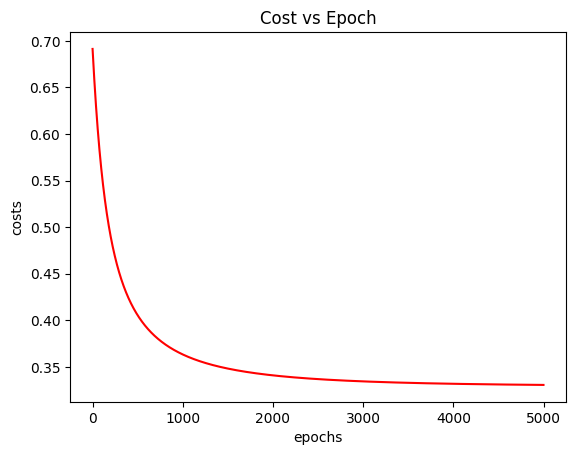

In [22]:
plt.plot(range(len(costs)),costs,color='red')
plt.ylabel('costs')
plt.xlabel('epochs')
plt.title('Cost vs Epoch')
plt.show()

## Accuracy of Predicted Values

In [23]:
ytrain_pred = predict(X_train,w,b,0.5)
ytest_pred = predict(X_test,w,b,0.5)
train_accuracy = accuracy(y_train,ytrain_pred)
test_accuracy = accuracy(y_test,ytest_pred)
print(f"Training data accuracy: {train_accuracy} \nTesting data accuracy: {test_accuracy}")

Training data accuracy: 86.85000000000001 
Testing data accuracy: 88.8
